# Análisis de los resultados arrojados por el clasificador BERT

#### Importación de bibliotecas

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga y selección de datos

In [2]:
"""Para el análisis de las métricas del modelo necesitamos las etiquetas verdaderas y las predicciones del clasificador.
Las diferencias en los nombres de las columnas y los atributos adicionales en los df no son un inconveniente para el análisis, siempre que podamos
identificar claramente las columnas que contineen las etiquetas verdaderas y las predicciones. Para ello, debemos asegurarnos de alinear correctamente
las columnas de ambos dataframes.
- Unimos las columnas de título y descripción de ofertas de empleo de ambos dataframes para asegurar que cada predicción se compare con la etiqueta correcta.
- Fusionamos las columnas comunes ('title' y 'description') de etiquetas y predicciones"""

# Cargamos los df, renombramos columnas y eliminamos duplicados innecesarios
df_true = pd.read_csv('test_data/lim_sample_onet_codes.csv', sep=";").rename(columns={'onetCode': 'true_onetCode'}).drop_duplicates()
df_pred = pd.read_csv('sample_inference.csv', sep=";").rename(columns={'onet_code': 'predicted_onetCode'}).drop_duplicates()

# Aseguramos que los datos estén limpios y bien formateados
df_true['title'] = df_true['title'].str.strip()
df_true['description'] = df_true['description'].str.strip()
df_pred['title'] = df_pred['title'].str.strip()
df_pred['description'] = df_pred['description'].str.strip()

# Fusionamos los df por las columnas comunes
merged_df = pd.merge(df_true, df_pred, on=['title', 'description'], how='inner')

# Agrupamos, contamos y ordenamos según las columnas de título, descripción y predicción de códigos Onet
freq_df = merged_df.groupby(['title', 'description', 'predicted_onetCode']).size().reset_index(name='count')
freq_df = freq_df.sort_values(by=['title', 'description', 'predicted_onetCode', 'count'], ascending=[True, True, True, True])

# Eliminamos duplicados manteniendo la entrada más frecuente o la primera alfabéticamente en caso de empate
filtered_df = freq_df.drop_duplicates(subset=['title', 'description'], keep='first')

# Fusionamos el df filtrado con el df de etiquetas verdaderas para obtener nuestro df final
final_merged_df = pd.merge(df_true, filtered_df, on=['title', 'description'])
# Seleccionamos y reordenamos las columnas necesarias
final_merged_df = final_merged_df[['title', 'description', 'true_onetCode', 'predicted_onetCode', 'count']].sort_values(by='predicted_onetCode', ascending=True)

In [3]:
print('\nDf fusionado inicial:\n')
merged_df.head(20)


Df fusionado inicial:



,true_onetCode,title,description,predicted_onetCode,onet_name,onet_desc,other_possible_onets
0,15-1299.05,SENIOR SIEM Engineer,Who are we? Amaris Consulting is an independe...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
1,15-1244.00,System Administrator,Job Description\n\nBig Data Systems Administra...,29-2072.00,Medical Records Specialists,"Compile, process, and maintain medical records...",Computer Systems Engineers/Architects\nTelecom...
2,15-1244.00,System Administrator,Job Description\n\nBig Data Systems Administra...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
3,15-2051.00,Consultor/a Data Analytics,🔎 ¡Estamos buscando a un/a Consultor/a Data An...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
4,15-1242.00,Senior Database Administrator,Overview\n\nSenior Database Administrator- BCN...,25-9044.00,"Teaching Assistants, Postsecondary",Assist faculty or other instructional staff in...,Calibration Technologists and Technicians\nCom...
5,15-2051.00,Technical Leader Data,En Sopra Steria trabajamos para hacer posible ...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
6,15-1299.01,Técnico de Hubspot,"Descripción\n Somos SDi Digital Group, una ag...",27-1024.00,Graphic Designers,Design or create graphics to meet specific com...,Computer Network Support Specialists\nWeb and ...
7,15-1242.00,Administrador/a de Bases de Datos,En Claire Joster somos expertos en la selecció...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
8,15-1211.00,plaça d'Analista informàtic CIDO,Generalitat de Catalunya - Servei Català de Tr...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...
9,15-1253.00,Quality Assurance Automation Engineer,Si te digo...\n\nTecnologías punteras\nEquipos...,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,Legal Secretaries and Administrative Assistant...


In [4]:
print('\nAgrupado y conteo de predicciones:\n')
freq_df.head(20)


Agrupado y conteo de predicciones:



,title,description,predicted_onetCode,count
0,#DISCOVER I 2024 - Data Analyst for RFE In-Ser...,Job Description\n\nReady to join one of our Gr...,25-9044.00,1
1,#DISCOVER I 2024 - Data Analyst for RFE In-Ser...,Job Description: \n Ready to join one of our G...,25-9044.00,1
2,#DISCOVER I 2024 Flight Physics - Artificial I...,Job Description: \n Ready to join one of our G...,15-1299.09,1
3,#DISCOVER I 2024 IR Enhanced Situation Awareness,Job Description: \n \n Ready to join one of o...,25-9044.00,1
4,#DISCOVER I 2024 Junior Software Developer for...,Job Description\n\nReady to join one of our Gr...,15-1299.09,1
5,#DISCOVER I 2024 Microwave instrument analysis...,Job Description: \n Ready to join one of our G...,25-9044.00,1
6,#DISCOVER I 2024 Software Algorithms and Artif...,Job Description\n\nReady to join one of our Gr...,25-9044.00,3
7,#DISCOVER I 2024 Trainee for Spanish Earth Obs...,Job Description: \n Ready to join one of our G...,25-9044.00,1
8,(-/Senior/Principal) NLP Scientist (Remote),Veeva Systems is a mission-driven organization...,15-1299.09,1
9,(00234) MODELADOR/A DE NEGOCIO,FUNCIONES\n \n \n \n \n Conocer...,11-1011.00,1


In [5]:
print('\nDf sin duplicados:\n')
filtered_df.head(20)


Df sin duplicados:



,title,description,predicted_onetCode,count
0,#DISCOVER I 2024 - Data Analyst for RFE In-Ser...,Job Description\n\nReady to join one of our Gr...,25-9044.00,1
1,#DISCOVER I 2024 - Data Analyst for RFE In-Ser...,Job Description: \n Ready to join one of our G...,25-9044.00,1
2,#DISCOVER I 2024 Flight Physics - Artificial I...,Job Description: \n Ready to join one of our G...,15-1299.09,1
3,#DISCOVER I 2024 IR Enhanced Situation Awareness,Job Description: \n \n Ready to join one of o...,25-9044.00,1
4,#DISCOVER I 2024 Junior Software Developer for...,Job Description\n\nReady to join one of our Gr...,15-1299.09,1
5,#DISCOVER I 2024 Microwave instrument analysis...,Job Description: \n Ready to join one of our G...,25-9044.00,1
6,#DISCOVER I 2024 Software Algorithms and Artif...,Job Description\n\nReady to join one of our Gr...,25-9044.00,3
7,#DISCOVER I 2024 Trainee for Spanish Earth Obs...,Job Description: \n Ready to join one of our G...,25-9044.00,1
8,(-/Senior/Principal) NLP Scientist (Remote),Veeva Systems is a mission-driven organization...,15-1299.09,1
9,(00234) MODELADOR/A DE NEGOCIO,FUNCIONES\n \n \n \n \n Conocer...,11-1011.00,1


In [6]:
print('\nDf fusionado final:\n')
final_merged_df.head(20)


Df fusionado final:



,title,description,true_onetCode,predicted_onetCode,count
0,SENIOR SIEM Engineer,Who are we? Amaris Consulting is an independe...,15-1299.05,11-1011.00,1
7480,SW Calibration Engineer,At EDAG Engineering Spain we offer engineering...,15-1299.00,11-1011.00,1
7478,Programador/a PHP,Bookish somos una startup del sector editorial...,15-1254.00,11-1011.00,1
7475,Senior Backend,En AXPE Consulting estamos transformando el mu...,15-1299.07,11-1011.00,1
7472,[IS]Systems administrator | Oracle,¡Únete a nuestro equipo como Administrador de ...,15-1244.00,11-1011.00,1
7471,Senior Backend Developer - Node (100% Remote),"Tether, the founder of the first, largest, and...",15-1299.07,11-1011.00,1
7470,Sysadmin Engineer,Nuestro cliente:\n Empresa global con sede en...,15-1241.00,11-1011.00,1
7468,Programador Front Angular,Desde Grupo NS precisamos incorporar un perfil...,15-1254.00,11-1011.00,1
7466,Programador/a .NET con Francés (Cliente Final),En Sopra Steria trabajamos para hacer posible ...,15-1251.00,11-1011.00,1
7464,Programador Java + Microservicios,¡Únete a nuestro equipo! 💼\n\n\n\n\nEstamos en...,15-1251.00,11-1011.00,1


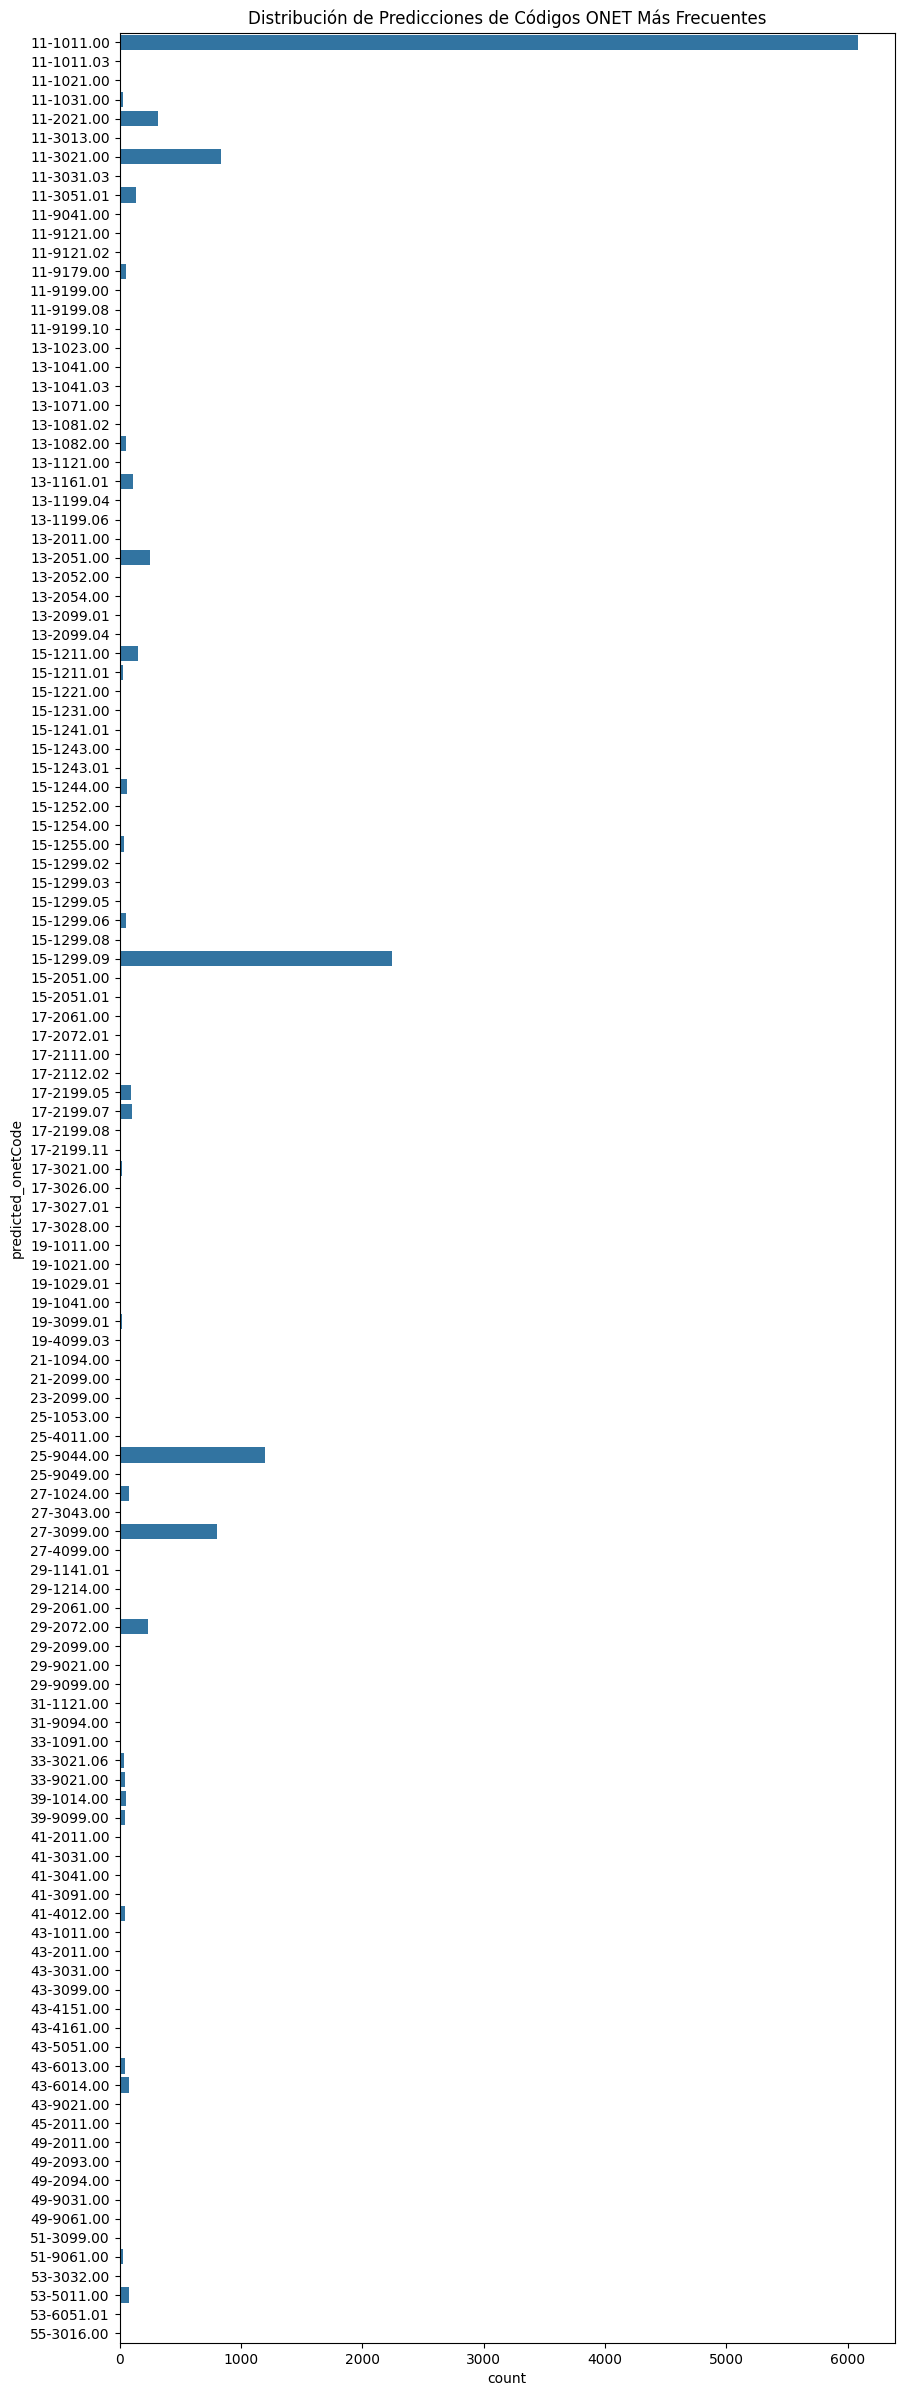

In [7]:
# Mostramos las frecuencias de códigos Onet predichos por el clasificador
plt.figure(figsize=(10, 30))
sns.countplot(data=final_merged_df, y='predicted_onetCode')
plt.title('Distribución de Predicciones de Códigos ONET Más Frecuentes')
plt.show()

Text(0, 0.5, 'Códigos Onet clasificador BERT')

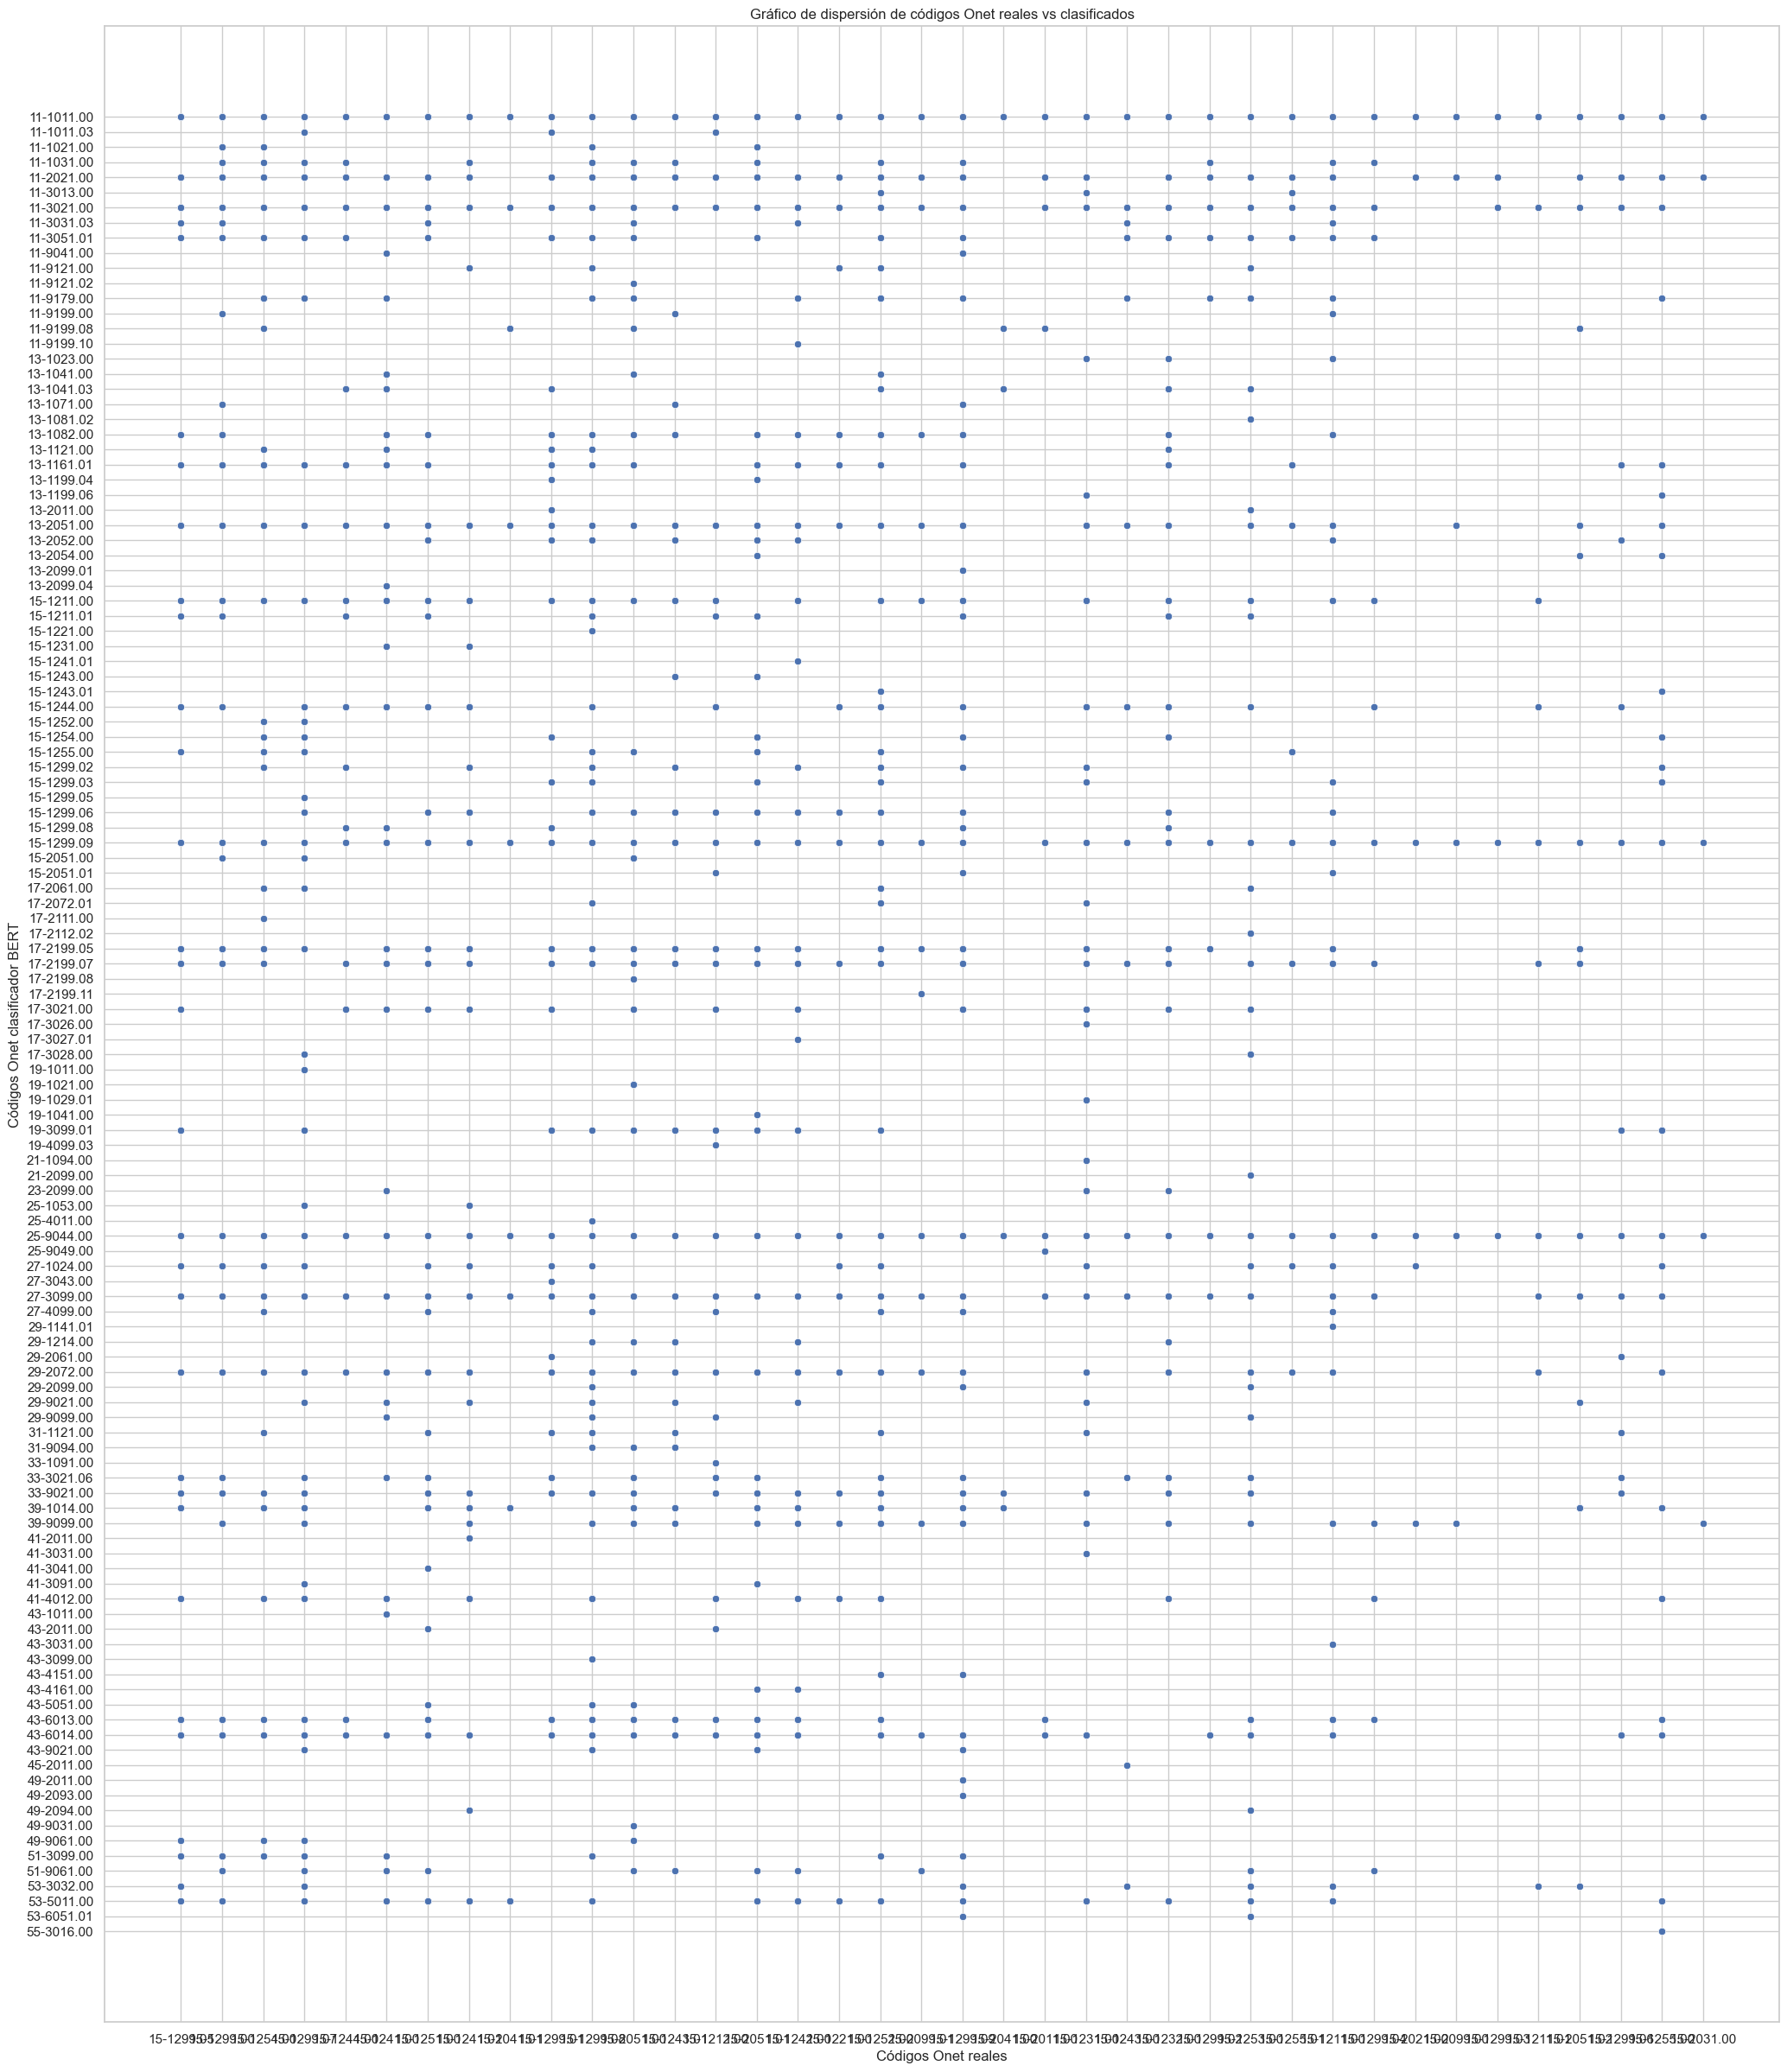

In [8]:
# Gráfica de dispersión para comparar códigos Onet
sns.set_theme(style='whitegrid')
plt.figure(figsize=(25,30))
scatter_plot = sns.scatterplot(x='true_onetCode', y='predicted_onetCode', data=final_merged_df)

plt.title('Gráfico de dispersión de códigos Onet reales vs clasificados')
plt.xlabel('Códigos Onet reales')
plt.ylabel('Códigos Onet clasificador BERT')

#### Comprobación de códigos Onet de tipo tecnológico (15-XXXX.XX) clasificados por el modelo

In [3]:
# Filtramos ofertas tecnológicas
tech_jobs = final_merged_df[final_merged_df['predicted_onetCode'].str.startswith('15-')]
# Contamos los códigos Onet tech y los totales
df_true_count = df_true.shape[0]
tech_jobs_count = tech_jobs.shape[0]
# Contamos los códigos Onet tech únicos
tech_jobs_counts = final_merged_df['predicted_onetCode'][final_merged_df['predicted_onetCode'].str.startswith('15-')].value_counts()

percent_tech = (tech_jobs_count / df_true_count) * 100

print('Número total de códigos Onet obtenidos de la base de datos de Big Query:', df_true_count)
print('\nNúmero total de códigos Onet tipo tech clasificados por el modelo BERT:', tech_jobs_count)
print(f'\nPorcentaje de códigos Onet clasificados: {percent_tech:.2f}%')
print('\nNúmero total de códigos Onet tipo tech únicos clasificados por el modelo BERT:\n', tech_jobs_counts)

Número total de códigos Onet obtenidos de la base de datos de Big Query: 13826

Número total de códigos Onet tipo tech clasificados por el modelo BERT: 2640

Porcentaje de códigos Onet clasificados: 19.09%

Número total de códigos Onet tipo tech únicos clasificados por el modelo BERT:
 15-1299.09    2243
15-1211.00     152
15-1244.00      58
15-1299.06      56
15-1255.00      36
15-1211.01      26
15-1299.02      13
15-1299.03      12
15-1254.00      11
15-1243.00       6
15-2051.00       6
15-1299.08       5
15-1252.00       4
15-1243.01       3
15-1231.00       3
15-2051.01       3
15-1241.01       1
15-1299.05       1
15-1221.00       1
Name: predicted_onetCode, dtype: int64


#### Comprobación de códigos Onet de tipo tecnológico bien clasificados por el modelo, comparando los valores reales y las predicciones

In [4]:
# Comparamos las columnas 'true_onetCode' y 'predicted_onetCode'
# Filtramos ofertas tecnológicas
tech_mask = final_merged_df['predicted_onetCode'].str.startswith('15-') & final_merged_df['true_onetCode'].str.startswith('15-')
tech_df = final_merged_df[tech_mask]
# Contamos coincidencias y no coincidencias
matches_count = (tech_df['predicted_onetCode'] == tech_df['true_onetCode']).sum()
non_matches_count = (tech_df['predicted_onetCode'] != tech_df['true_onetCode']).sum()

percent_tech_correct = (matches_count / tech_jobs_count) * 100

print(f'Número de códigos Onet de tipo tecnológico correctamente clasificados: {matches_count}')
print(f"Número de códigos ONET de tipo tecnológico incorrectamente clasificados: {non_matches_count}")
print(f'Porcentaje de códigos Onet tipo tecnológicos correctamente clasificados: {percent_tech_correct:.2f}%')

Número de códigos Onet de tipo tecnológico correctamente clasificados: 171
Número de códigos ONET de tipo tecnológico incorrectamente clasificados: 2469
Porcentaje de códigos Onet tipo tecnológicos correctamente clasificados: 6.48%


In [ ]:
# Creamos una nueva columna que indica si hubo coincidencia
tech_df['Match'] = tech_df['predicted_onetCode'] == tech_df['true_onetCode']

# Gráfica de barras de las coincidencias vs. no coincidencias
sns.countplot(x='Match', data=tech_df)
plt.title('Clasificación de códigos Onet de tipo tecnológico')
plt.xlabel('Coincidencia')
plt.ylabel('Cantidad')
plt.show()

#### Comprobación de códigos Onet clasificados como no-tecnológicos

In [5]:
# Filtramos ofertas no tecnológicas
non_tech_true = final_merged_df[~final_merged_df['true_onetCode'].str.startswith('15-')]
non_tech_predicted = final_merged_df[~final_merged_df['predicted_onetCode'].str.startswith('15-')]

# Contamos las ofertas no tecnológicas
non_tech_true_count = non_tech_true.shape[0]
non_tech_predicted_count = non_tech_predicted.shape[0]

print(f"Número de ofertas verdaderas no tecnológicas extraídas de Big Query: {non_tech_true_count}")
print(f"Número de ofertas clasificadas por BERT como no tecnológicas: {non_tech_predicted_count}")

Número de ofertas verdaderas no tecnológicas extraídas de Big Query: 0
Número de ofertas clasificadas por BERT como no tecnológicas: 11186


## Análisis de las métricas del modelo

### Métricas del modelo global

##### · Promediación para trabajar con el conjunto completo de códigos Onet
        Esto nos permite obtener las métricas de todos los códigos Onet (tech y no-tech) que ha clasificado el modelo

In [22]:
true_labels = final_merged_df['true_onetCode']
predicted_labels = final_merged_df['predicted_onetCode']

# Accuracy (precisión del modelo)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy o precisión global del modelo: {accuracy:.4f}')

# Calculamos precision, recall, y F1-score globales
# Establecemos 'average' en 'macro' para calcular la métrica promedio sin ponderar por etiqueta, es decir, sin tener en cuenta la cantidad de instanciar de cada clase
precision_macro = precision_score(true_labels, predicted_labels, average='macro', zero_division=0)
recall_macro = recall_score(true_labels, predicted_labels, average='macro', zero_division=0)
f1_macro = f1_score(true_labels, predicted_labels, average='macro', zero_division=0)
print(f"Precision o exactitud global del modelo: {precision_macro:.4f}")
print(f"Recall global: {recall_macro:.4f}")
print(f"F1 Score global: {f1_macro:.4f}")

# Establecemos 'average' en 'weighted' para calcular la métrica en las que cada clase se pondera según su presencia en los datos reales
precision_weighted = precision_score(true_labels, predicted_labels, average='weighted')
recall_weighted = recall_score(true_labels, predicted_labels, average='weighted')
f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
print(f"Precision o exactitud global del modelo: {precision_weighted:.4f}")
print(f"Recall global: {recall_weighted:.4f}")
print(f"F1 Score global: {f1_weighted:.4f}")

# Obtenemos un reporte de clasificación detallado
report = classification_report(true_labels, predicted_labels, zero_division=0)
print("\nReporte de clasificación:\n", report)

Accuracy o precisión global del modelo: 0.0124
Precision o exactitud global del modelo: 0.0068
Recall global: 0.0020
F1 Score global: 0.0013


c:\Anaconda\envs\TalentTools\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\envs\TalentTools\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision o exactitud global del modelo: 0.0495
Recall global: 0.0124
F1 Score global: 0.0072

Reporte de clasificación:
               precision    recall  f1-score   support

  11-1011.00       0.00      0.00      0.00         0
  11-1011.03       0.00      0.00      0.00         0
  11-1021.00       0.00      0.00      0.00         0
  11-1031.00       0.00      0.00      0.00         0
  11-2021.00       0.00      0.00      0.00         0
  11-3013.00       0.00      0.00      0.00         0
  11-3021.00       0.00      0.00      0.00         0
  11-3031.03       0.00      0.00      0.00         0
  11-3051.01       0.00      0.00      0.00         0
  11-9041.00       0.00      0.00      0.00         0
  11-9121.00       0.00      0.00      0.00         0
  11-9121.02       0.00      0.00      0.00         0
  11-9179.00       0.00      0.00      0.00         0
  11-9199.00       0.00      0.00      0.00         0
  11-9199.08       0.00      0.00      0.00         0
  11-9199.10 

### Métricas del modelo para códigos Onet tipo tecnológico

##### · Binarización para evaluar las métricas de los códigos Onet tipo tecnológico clasificados por el modelo.
        Esto nos permite comprobar las métricas sobre los códigos Onet de tipo tecnológico (15-XXXX.XX) que ha clasificado el modelo

In [23]:
# Convertimos los códigos a clases binarias: 1 si es '15-' (tech), 0 si no lo es
true_labels = final_merged_df['true_onetCode'].str.startswith('15-').astype(int)
predicted_labels = final_merged_df['predicted_onetCode'].str.startswith('15-').astype(int)

# Accuracy (precisión del modelo)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy o precisión del modelo: {accuracy:.4f}')
# Precision (exactitud del modelo)
precision = precision_score(true_labels, predicted_labels)
print(f'Precision o exactitud del modelo: {precision:.4f}')
# Recall
recall = recall_score(true_labels, predicted_labels)
print(f'Recall: {recall:.4f}')
# F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f'F1 score: {f1:.4f}')

# Obtenemos un reporte de clasificación detallado
report = classification_report(true_labels, predicted_labels, zero_division=0)
print("\nReporte de clasificación:\n", report)

Accuracy o precisión del modelo: 0.1909
Precision o exactitud del modelo: 1.0000
Recall: 0.1909
F1 score: 0.3207

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.19      0.32     13826

    accuracy                           0.19     13826
   macro avg       0.50      0.10      0.16     13826
weighted avg       1.00      0.19      0.32     13826



## Análisis de las matrices de confusión

### Matriz de confusión global

In [ ]:
"""#! Esta MC global es inútil, demasiado grande y mal formada!!!"""

# Generar la matriz de confusión
cm_total = confusion_matrix(final_merged_df['true_onetCode'], final_merged_df['predicted_onetCode'])

# Etiquetas para los ejes que serán los códigos ONET únicos (ordenados alfabéticamente por defecto)
labels = sorted(final_merged_df['true_onetCode'].append(final_merged_df['predicted_onetCode']).unique())

plt.figure(figsize=(40, 30))  # Tamaño de la figura
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión de Códigos ONET')
plt.xlabel('Códigos ONET Predichos')
plt.ylabel('Códigos ONET Verdaderos')
plt.show()

### Matriz de confusión para códigos Onet de tipo tecnológico

Accuracy: 0.06477272727272727


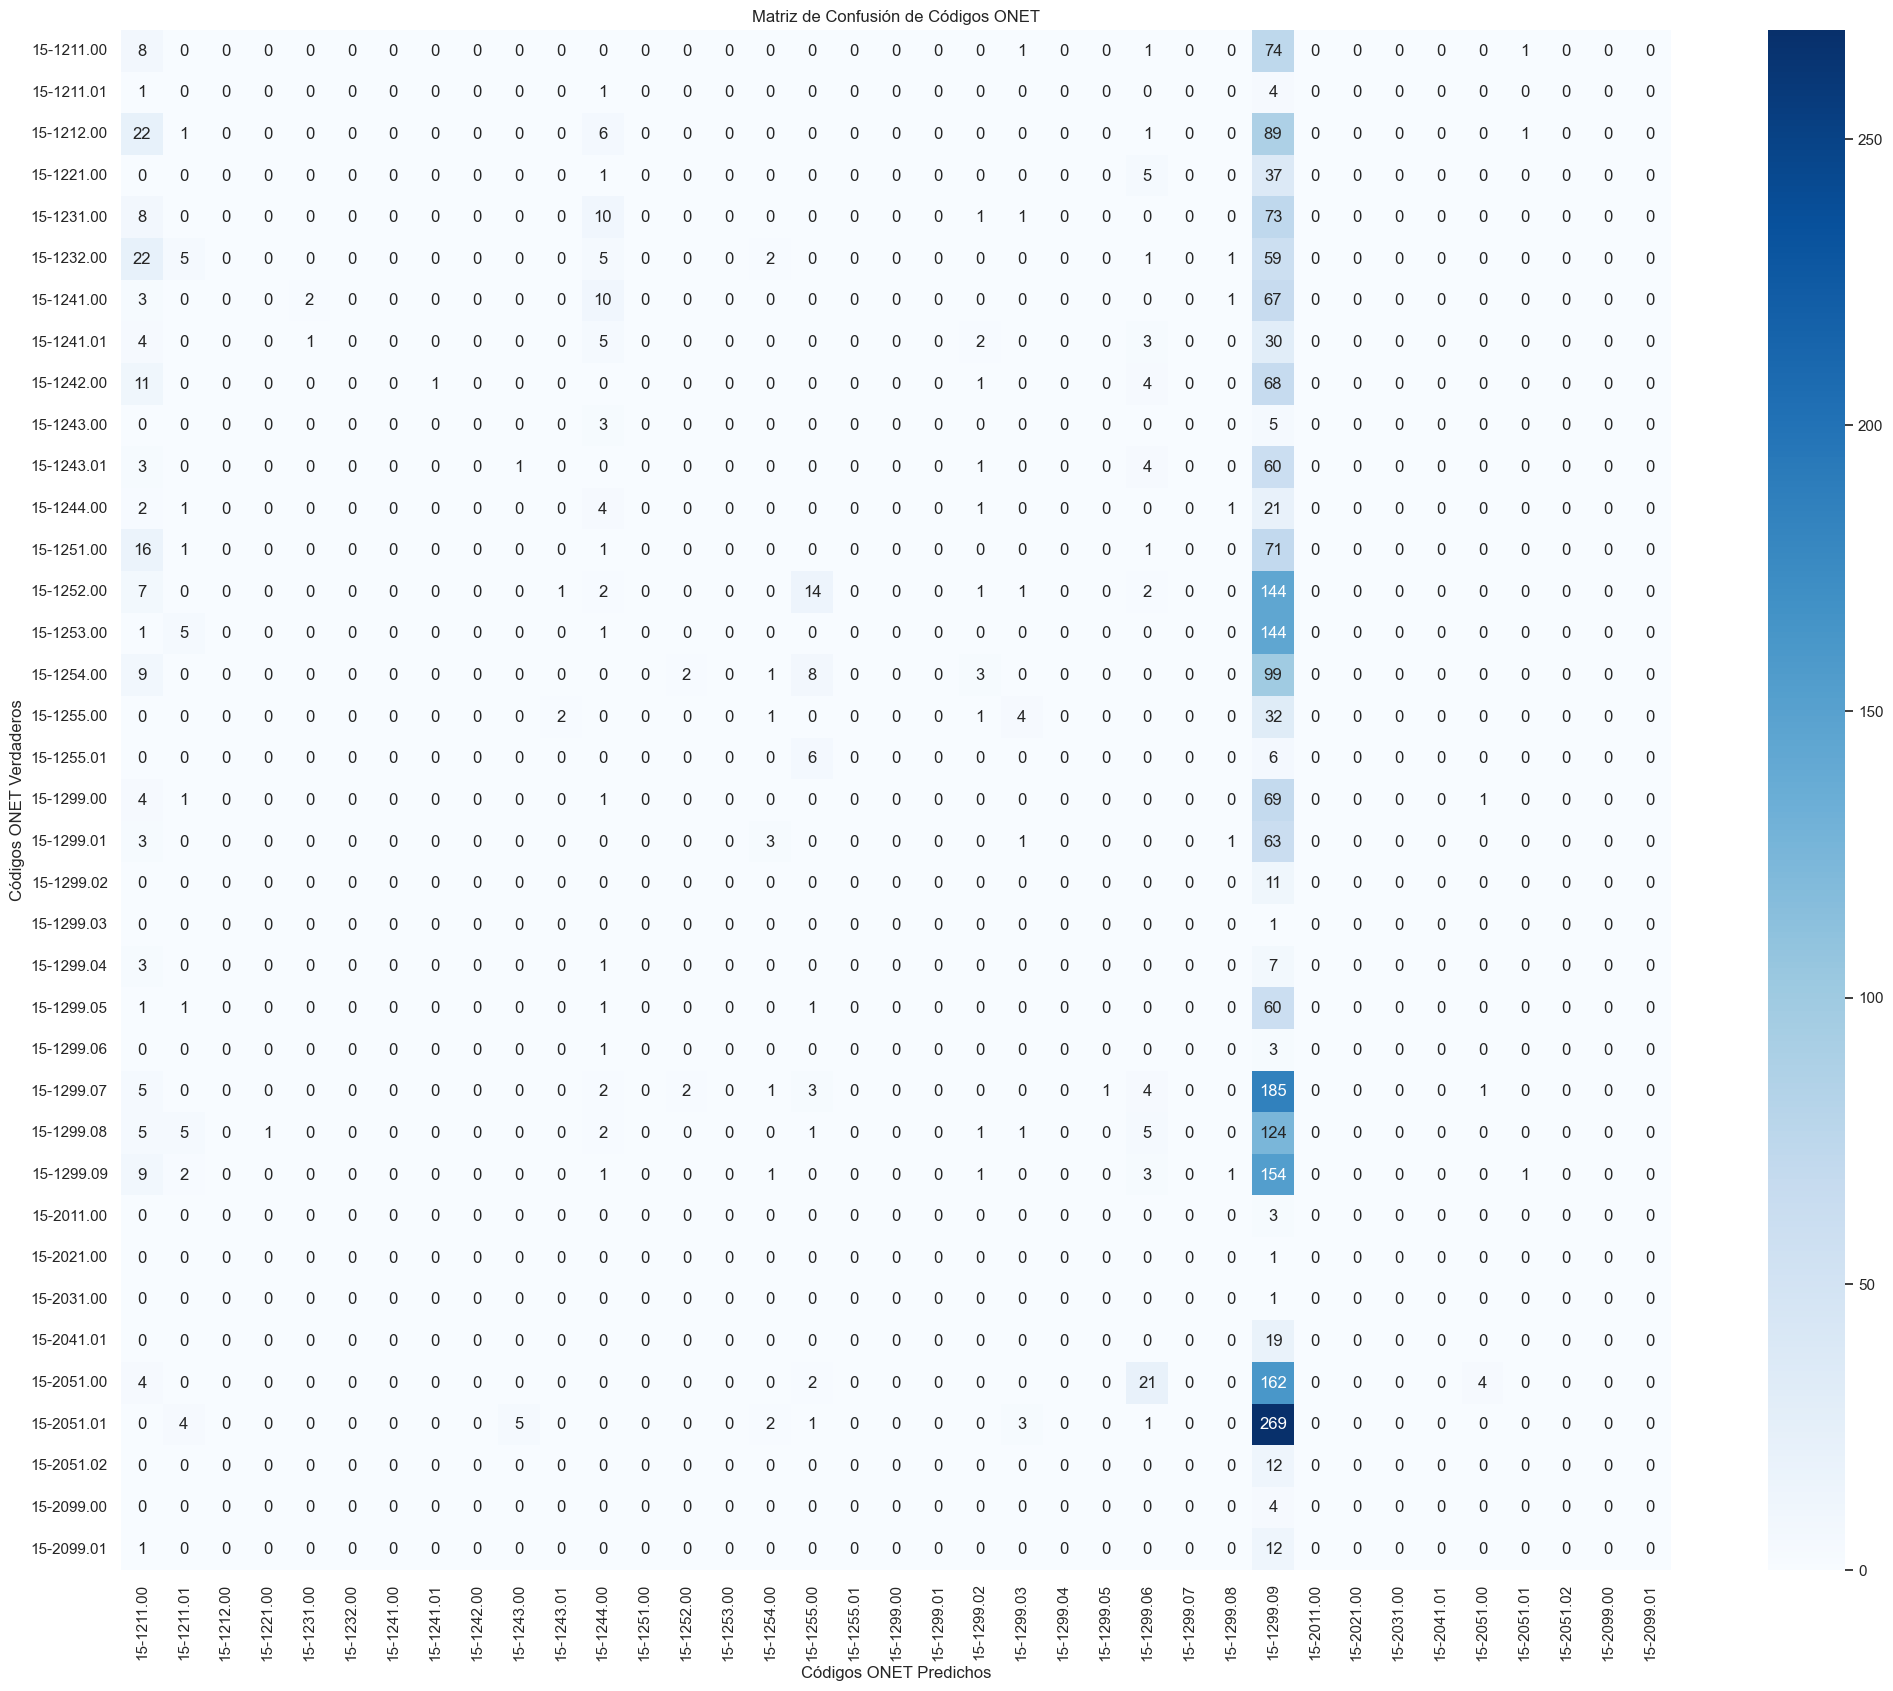

In [47]:
cm1 = confusion_matrix(tech_df['true_onetCode'], tech_df['predicted_onetCode'])

# Etiquetas para los ejes que serán los códigos ONET únicos (ordenados alfabéticamente por defecto)
labels = sorted(tech_df['true_onetCode'].append(tech_df['predicted_onetCode']).unique())

plt.figure(figsize=(25, 20))  # Tamaño de la figura
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión de Códigos ONET')
plt.xlabel('Códigos ONET Predichos')
plt.ylabel('Códigos ONET Verdaderos')
plt.show()